# 第三章 使用scikit-learn实现机器学习分类算法

In [5]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#感知机模型
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40,eta0=.1,random_state=0)
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_pred!=y_test).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 4
Accuracy: 0.91


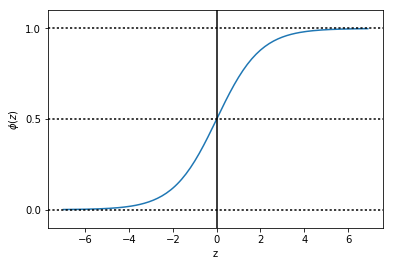

In [12]:
#sigmoid函数
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(.0,color='k')
plt.axhspan(.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(0,ls='dotted',color='k')
plt.axhline(.5,ls='dotted',color='k')
plt.axhline(1.0,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

In [20]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

In [17]:
sum(X_xor[:,1]>0)

103

In [18]:
sum(X_xor[:,0]>0)

88

In [22]:
sum(y_xor==-1)

99

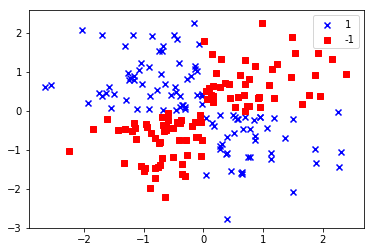

In [25]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

#决策树
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
y_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('Prediction accuracy: %.3f' % accuracy_score(y_test,y_pred))
#plt.plot(tree)

# 第四章 数据预处理

In [32]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [33]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [35]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

In [36]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

In [37]:
import pandas as pd

df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [39]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [41]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [42]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [47]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [52]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [53]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [3]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                  'Proanthovyanins','Color intensity','Hue','OD280','Proline']
print('Class label',np.unique(df_wine['Class label']))
df_wine.head()

Class label [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthovyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#划分数据
from sklearn.cross_validation import train_test_split

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#特征缩放
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [8]:
#L1正则化
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

lr = LogisticRegression(penalty='l1',C=.1)
lr.fit(X_train_std,y_train)
print("Training accuracy:",lr.score(X_train_std,y_train))
print("Test accuracy:",lr.score(X_test_std,y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [9]:
lr.intercept_

array([-0.38378516, -0.15812774, -0.70041935])

In [10]:
lr.coef_

array([[ 0.27992629,  0.        ,  0.        , -0.02787559,  0.        ,
         0.        ,  0.71002476,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23657247],
       [-0.6437432 , -0.06892697, -0.05718515,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92719491,
         0.05975969,  0.        , -0.37099848],
       [ 0.        ,  0.06169402,  0.        ,  0.        ,  0.        ,
         0.        , -0.63614302,  0.        ,  0.        ,  0.49813358,
        -0.35794276, -0.57135104,  0.        ]])

In [14]:
#随机森林特征选择
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1,30,feat_labels[indices[f]],importances[f]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity                     0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthovyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280                          0.014645
13) Proline                        0.013916


In [22]:
print(importances)
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

[ 0.10658906  0.02539968  0.01391619  0.03203319  0.02207807  0.0607176
  0.15094795  0.01464516  0.02235112  0.18248262  0.07824279  0.1319868
  0.15860977]
 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280                          0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity                     0.032033
 9) Malic acid                     0.025400
10) Proanthovyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


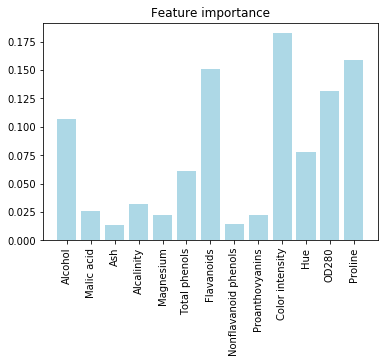

In [31]:
import matplotlib.pyplot as plt

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),importances,color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
#plt.tight_layout()
plt.show()

# 第五章 通过降维压缩数据

## 主成分分析

In [33]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [35]:
#计算协方差矩阵特征对
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n%s' % eigen_vals)

Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


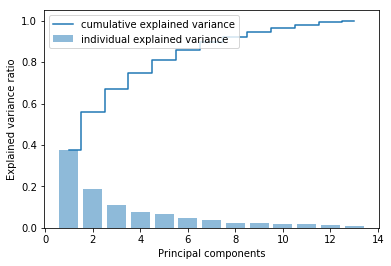

In [38]:
#方差贡献率图像(variance explained ratios)
tot = sum(eigen_vals)
var_exp = [i/tot for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14),var_exp,alpha=.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='upper left')
plt.show()

In [39]:
#特征转换
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [44]:
help(np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).



In [47]:
eigen_pairs[0][1][:,np.newaxis]

array([[ 0.14669811],
       [-0.24224554],
       [-0.02993442],
       [-0.25519002],
       [ 0.12079772],
       [ 0.38934455],
       [ 0.42326486],
       [-0.30634956],
       [ 0.30572219],
       [-0.09869191],
       [ 0.30032535],
       [ 0.36821154],
       [ 0.29259713]])

In [48]:
X_train_pca = X_train_std.dot(w)


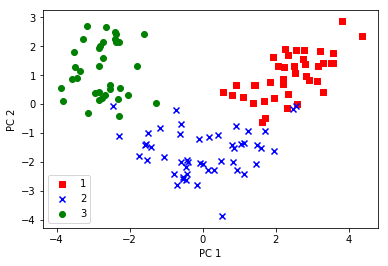

In [50]:
colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## 线性判别分析 LDA

# 第六章 模型评估与参数调优

In [5]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [6]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M','B'])

from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)


In [7]:
#流水线
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline(
    [('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression(random_state=1))]
)
pipe_lr.fit(X_train,y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.947


In [8]:
#交叉验证
import numpy as np
from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y=y_train,n_folds=10,random_state=1)
scores= []
for k,(train,test) in enumerate(kfold):
    #print('train =',train,'test =',test)
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Accuracy: %.3f' % (k+1,np.bincount(y_train[train]),score))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Fold: 1, Class dist.: [256 153], Accuracy: 0.891
Fold: 2, Class dist.: [256 153], Accuracy: 0.978
Fold: 3, Class dist.: [256 153], Accuracy: 0.978
Fold: 4, Class dist.: [256 153], Accuracy: 0.913
Fold: 5, Class dist.: [256 153], Accuracy: 0.935
Fold: 6, Class dist.: [257 153], Accuracy: 0.978
Fold: 7, Class dist.: [257 153], Accuracy: 0.933
Fold: 8, Class dist.: [257 153], Accuracy: 0.956
Fold: 9, Class dist.: [257 153], Accuracy: 0.978
Fold: 10, Class dist.: [257 153], Accuracy: 0.956
CV accuracy: 0.950 +/- 0.029


In [9]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


## 学习曲线和验证曲线

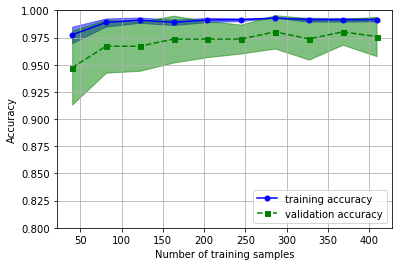

In [18]:
#学习曲线
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
        ('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))
    ])
train_sizes,train_scores,test_scores = learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=.5,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=.5,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([.8,1.0])
plt.show()

In [11]:
help(learning_curve)

Help on function learning_curve in module sklearn.learning_curve:

learning_curve(estimator, X, y, train_sizes=array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch='all', verbose=0, error_score='raise')
    Learning curve.
    
    .. deprecated:: 0.18
        This module will be removed in 0.20.
        Use :func:`sklearn.model_selection.learning_curve` instead.
    
    Determines cross-validated training and test scores for different training
    set sizes.
    
    A cross-validation generator splits the whole dataset k times in training
    and test data. Subsets of the training set with varying sizes will be used
    to train the estimator and a score for each training subset size and the
    test set will be computed. Afterwards, the scores will be averaged over
    all k runs for each training subset size.
    
    Read more in the :ref:`User Guide <learning_curves>`.
    
    Parameters
    ---------

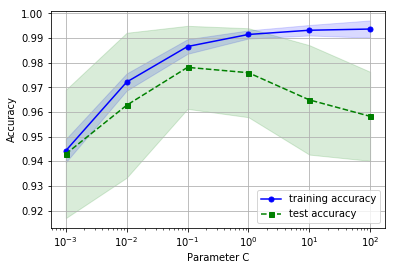

In [21]:
#验证曲线
from sklearn.learning_curve import validation_curve

param_range = [.001,.01,.1,1.0,10.0,100.0]
train_scores,test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='clf__C',
                                            param_range=param_range,cv=10)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=.15,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='test accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=.15,color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.show()

## 性能评价指标

In [25]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe_svc = Pipeline([
    ('scl',StandardScaler()),('clf',SVC(random_state=1))
])
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


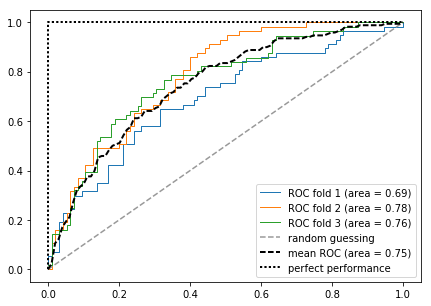

In [26]:
#roc
from sklearn.metrics import roc_curve,auc
from scipy import interp

X_train2 = X_train[:,[4,14]]
cv = StratifiedKFold(y_train,n_folds=3,random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = .0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i,(train,test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,thresholds = roc_curve(y_train[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0] = .0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %.2f)' % (i+1,roc_auc))

plt.plot([0,1],[0,1],linestyle='--',color=(.6,.6,.6),label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,'k--',label='mean ROC (area = %.2f)' % mean_auc,lw=2)
plt.plot([0,0,1],[0,1,1],lw=2,linestyle=':',color='black',label='perfect performance')
plt.legend(loc='lower right')
plt.show()

### adaboost

In [27]:
#葡萄酒数据集
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [28]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                  'Proanthovyanins','Color intensity','Hue','OD280','Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol','Hue']]

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=1)


In [31]:
#单层决策树
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=.1,random_state=0)
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decison tree train/test accuracies %.3f/%.3f' % (tree_train,tree_test))

Decison tree train/test accuracies 0.845/0.854


In [32]:
#adaboost
ada = ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train,y_train_pred)
ada_test = accuracy_score(y_test,y_test_pred)
print('Adaboost train/test accuracies %.3f/%.3f' % (ada_train,ada_test))

Adaboost train/test accuracies 1.000/0.875


# 第八章 情感分析

In [8]:
#数据集IMDB
import pyprind
import pandas as pd
import os

pbar = pyprind.ProgBar(50000)
labels = {'pos':1,'neg':0}
df = pd.DataFrame()
for s in ('test','train'):
    for l in ('pos','neg'):
        path = './aclImdb/%s/%s' % (s,l)
        for file in os.listdir(path):
            with open(os.path.join(path,file),'r',encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt,labels[l]]],ignore_index=True)
            pbar.update

df.columns = ['review','sentiment']

In [9]:
#to_csv
import numpy as np
import pandas as pd

np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('./movie_data.csv',index=False)

In [10]:
#从本地读取数据
import pandas as pd 
df = pd.read_csv('./movie_data.csv',encoding='gbk')
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


### 将单词转换为特征向量

In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([
    'The sun is shining','The weather is sweet','The sun is shining and the weather is sweet'
])
bag = count.fit_transform(docs)

In [12]:
print(count.vocabulary_)

{'the': 5, 'sun': 3, 'is': 1, 'shining': 2, 'weather': 6, 'sweet': 4, 'and': 0}


In [13]:
print(bag.toarray())

[[0 1 1 1 0 1 0]
 [0 1 0 0 1 1 1]
 [1 2 1 1 1 2 1]]


In [14]:
print(bag)

  (0, 2)	1
  (0, 1)	1
  (0, 3)	1
  (0, 5)	1
  (1, 4)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (2, 6)	1
  (2, 2)	1
  (2, 1)	2
  (2, 3)	1
  (2, 5)	2


In [15]:
count.vocabulary_.keys()

dict_keys(['the', 'sun', 'is', 'shining', 'weather', 'sweet', 'and'])

In [18]:
#tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
print(tfidf.fit_transform(bag).toarray())

[[ 0.    0.43  0.56  0.56  0.    0.43  0.  ]
 [ 0.    0.43  0.    0.    0.56  0.43  0.56]
 [ 0.4   0.48  0.31  0.31  0.31  0.48  0.31]]


In [19]:
#清洗文本数据
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [20]:
import re

def preprocessor(text):
    text = re.sub('<[^>]*>','',text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = re.sub('[\W]+',' ',text.lower()) + ' '.join(emoticons).replace('-','')
    return text



In [21]:
preprocessor(df.loc[0,'review'][-50:])

'is seven title brazil not available'

In [22]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [23]:
# 保存清洗后的文本
df['review'] = df['review'].apply(preprocessor)

In [24]:
#标记文档
def tokenizer(text):
    return text.split()

#词干提取 
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

In [26]:
#移除停用词
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and thus a lot') if w not in stop]

['runner', 'like', 'run', 'thu', 'lot']

## logistics regression in text classification

In [ ]:
#数据划分
X_train = df.loc[:25000,'review'].values
y_train = df.loc[:25000,'sentiment'].values
X_test = df.loc[25000:,'review'].values
y_test = df.loc[25000:,'sentiment'].values

#LR
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
param_grid = [
    {'vect__ngram_range':[(1,1)],'vect__stiop_words':[stop,None],'vect__tokenizer':[tokenizer,tokenizer_porter],'clf__penalty':['l1','l2'],'clf__C':[1.0,10.0,100.0]},
    {'vect__ngram_range':[(1,1)],'vect__stiop_words':[stop,None],'vect__tokenizer':[tokenizer,tokenizer_porter],
    'vect__use_idf':[False],'vect__norm':[None],'clf__penalty':['l1','l2'],'clf__C':[1.0,10.0,100.0]}
]
lr_tfidf = Pipeline([
    ('vect',tfidf),('clf',LogisticRegression(random_state=0))
])
gs_lr_tfidf = GridSearchCV(lr_tfidf,param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
gs_lr_tfidf.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
print('Best paramter set: %s' % gs_lr_tfidf.best_params_)